In [1]:
# Importing the usual libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# Read in the mushroom data into a dataframe called "data" - what a creative name
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [13]:
color_features = []
for i in data.columns:
    if 'color' in i:
        color_features.append(i)
# create our color dataframe and inspect first 5 rows with head()
data_color = data[color_features]
data_color.head()

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
0,n,k,w,w,w,k
1,y,k,w,w,w,n
2,w,n,w,w,w,n
3,w,n,w,w,w,k
4,g,k,w,w,w,n


In [14]:
from sklearn.preprocessing import LabelEncoder
# List to store all unique categories
ListToEncode = pd.Series(data_color.values.ravel()).unique()
# Use sklearn Labelencoder for transformation
EncodedList = LabelEncoder().fit_transform(ListToEncode)

# Define a dictionary "encodedict" to store our encoding
encodedict = {}
for i in range(0, len(EncodedList)):
    encodedict.update({ListToEncode[i]:EncodedList[i]})

# Finally use dictionary to generate encoded dataframe
for i in range(len(data_color.columns)):
    for j in range(len(data_color['cap-color'].values)):
        data_color.values[j][i] =  encodedict[data_color.values[j][i]]
data_color.head()       

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
0,6,5,11,11,11,5
1,12,5,11,11,11,6
2,11,6,11,11,11,6
3,11,6,11,11,11,5
4,3,5,11,11,11,6


In [16]:
# correlation matrix using the corr() method
data_corr = data_color.astype(float).corr()  # used the astype() or else I get empty results
data_corr

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
cap-color,1.000000,0.097253,0.089248,0.093015,-0.001314,-0.233534
gill-color,0.097253,1.000000,-0.058458,-0.074540,-0.107792,-0.474733
stalk-color-above-ring,0.089248,-0.058458,1.000000,0.509303,0.079030,0.225851
stalk-color-below-ring,0.093015,-0.074540,0.509303,1.000000,0.077198,0.209170
veil-color,-0.001314,-0.107792,0.079030,0.077198,1.000000,0.036781
spore-print-color,-0.233534,-0.474733,0.225851,0.209170,0.036781,1.000000


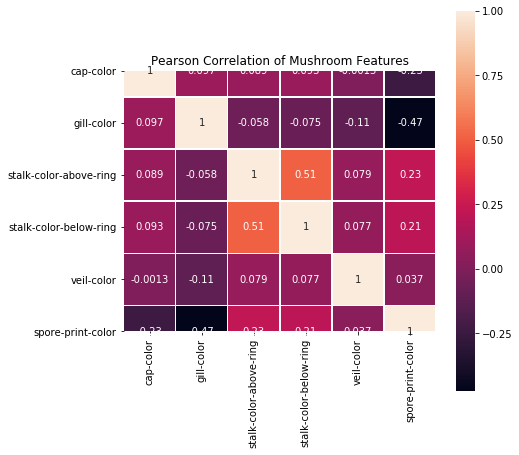

In [17]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Pearson Correlation of Mushroom Features')
# Draw the heatmap using seaborn
sns.heatmap(data_color.astype(float).corr(),linewidths=0.5,vmax=1.0, square=True, annot=True)

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [20]:
data.isnull().sum()#returns the missing values in the column.

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [21]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [23]:
data['stalk-color-above-ring'].unique()

array([7, 3, 6, 4, 0, 2, 5, 1, 8], dtype=int64)

In [24]:
print(data.groupby('class').size())

class
0    4208
1    3916
dtype: int64


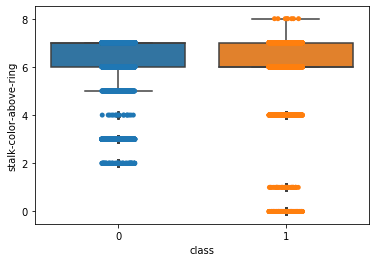

In [26]:
#Plotting boxplot to see the distribution of the data
ax = sns.boxplot(x='class', y='stalk-color-above-ring', 
                data=data)
ax = sns.stripplot(x="class", y='stalk-color-above-ring',
                   data=data, jitter=True,
                   edgecolor="gray")


In [8]:
#PCA
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [9]:
df=pd.read_csv('mushrooms.csv')

X = df.drop(['class'], axis = 1)
Y = df['class']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)



In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['class']], axis = 1)
PCA_df['class'] = LabelEncoder().fit_transform(PCA_df['class'])
PCA_df.head()

,PC1,PC2,class
0,-3.284747,1.020107,1
1,-3.969470,-0.856889,0
2,-4.958580,-0.211095,0
3,-3.469973,0.337939,1
4,-2.726559,0.889642,0


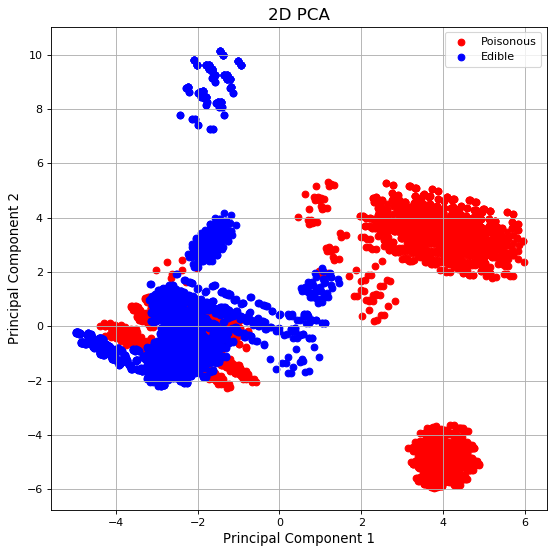

In [11]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['class'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['class'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()